In [58]:
using Plots, Statistics
day = 3600*24                     
y   = 3600*24*365.25
My  = 1e6* y

3.15576e13

### Earth and Sun: budget

The Earth receives high quality solar energy and radiates back low temperature radiation. This degradation causes a net entropy production.

The Earth receives a solar input $S_0$ (W/m2) over it's cross sectional area:
$A = \pi R_\text{Earth}$

It adsorbs solar power depending on the albedo $\alpha$:
$ \dot{Q}_\text{in} = (1-\alpha) S_0 A$

Entropy rates are defined as:
$ \dot{S} = \frac{\dot{Q}}{T}$ 

1. Calculate the adsorbed solar power.

2. Calculate the entropy inflow rate (sun temperature).

3. Calculate the entropy outflow rate (Earth temperature).

4. Calculate the net entropy production rate.

Earth receives heat from the sun but also radiates back. The heat flux associated with this is:

$\dot{Q}_\text{out} = \sigma T^4$ where $\sigma$ is Stefan-Boltzmann constant (W/m²/K⁴)

5. Use the above formula tu calculate $T$. Assume the value of $\dot{Q}_\text{out}$ is equal to $\dot{Q}_\text{in}$ (equilibrium). Comment on the obtained value.

In [59]:
# Constants
σ       = 5.67e-8             # Stefan-Boltzmann constant (W/m²/K⁴)
T_sun   = 5778.0              # Sun's surface temperature (K)
T_earth = 255.0               # Earth's effective emission temperature (K)
S0      = 1361.0              # Solar constant (W/m²)
albedo  = 0.3                 # Earth's average albedo
R_earth = 6.371e6             # Earth's radius (m)

# Step 1: Absorbed power by the Earth (W)
A       = π * R_earth^2          # Cross-sectional area (m²)
# Q̇_in    = ????????  # Net solar power absorbed (W)

# Step 2: Entropy flow rates (W/K)
# Ṡ_in   = ?????     # Entropy inflow rate (W/K)
# Ṡ_out  = ?????     # Entropy outflow rate (W/K)
# Ṡ_prod = ?????     # Net entropy production rate (W/K)

# Mean surface temperature
# T = ?????????

# Display results 
# println("Absorbed solar power:        $(Q̇_in/1e12) TW")
# println("Entropy inflow rate:         $(Ṡ_in/1e12) TW/K")
# println("Entropy outflow rate:        $(Ṡ_out/1e12) TW/K")
# println("Net entropy production rate: $(Ṡ_prod/1e12) TW/K")
# println("Temperature:                 $(T) k")

1.2751611797744706e14

### Earth and Sun: diurnal variations

Diurnal variations are fluctuations that occur through the day. 
Let's imagine we study one location on Earth and that, due to Earth rotation, exposition to sun varies during the day.

Diurnal variations are periodic and modulate $\dot{Q}_\text{in}$ with the factor:

$A_\text{diurnal} = \sin(\omega t - \frac{\pi}{2})$ where $\omega =  \frac{2\pi}{t_\text{day}}$ and $t_\text{day}$ is one day in seconds.

During the day, the input is modulated periodically: $Q̇_\text{max}  \sin{\left(ω  t - \frac{\pi}{2}\right)}$ due to the Earth rotation.

WARNING: This input should only be accounted during daylight time (i.e. when  $Q̇_\text{max}  \sin{\left(ω  t - \frac{\pi}{2}\right)} > 0$ )

1. Compute the current value of $\dot{Q}$

2. $\dot{S}_\text{in}$ 

3. $\dot{S}_\text{out}$  

4. $\dot{S}_\text{net}$

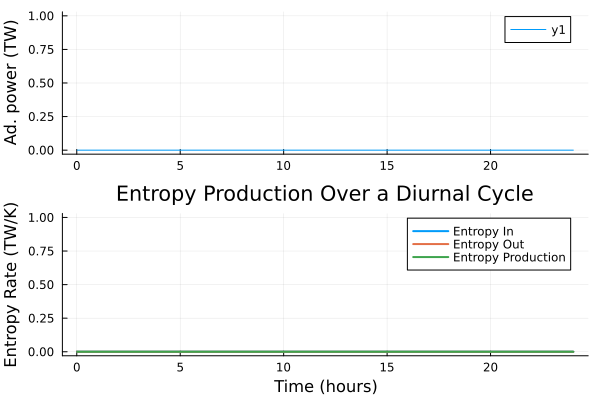

In [60]:
# Constants
T_sun    = 5778.0                  # K
T_earth  = 255.0                   # K
S0       = 1361.0                  # W/m² (solar constant)
albedo   = 0.3                     # Earth's average albedo
Qdot_max = (1 - albedo) * S0 * A   # max absorbed flux at noon (W)

# Numerics
nt = 1000
Δt = day/nt
t  = 0.

# Time setup: 1 day
ω   = 2π / day                     # angular freq (rad/s)

# Arrays
Q̇_in   = zeros(nt)      # W
Ṡ_in   = zeros(nt)      # W/K
Ṡ_out  = zeros(nt)      # W/K
Ṡ_prod = zeros(nt)      # W/K
t_vec  = t*ones(nt)

# Compute time-varying fluxes and entropy rates
for it in 1:nt

    t = t + Δt

    # Q̇          = ????????????       # absorbed solar flux
    # Q̇_in[it]   = ????????????
    # Ṡ_in[it]   = ????????????
    # Ṡ_out[it]  = ????????????
    # Ṡ_prod[it] = ????????????
    t_vec[it]  = t
end

# Plot entropy rates
p1 = plot(t_vec ./ 3600, Q̇_in./1e12, ylabel="Ad. power (TW)" )
p2 = plot(t_vec ./ 3600, [Ṡ_in Ṡ_out Ṡ_prod]./1e12, lw=2,
     xlabel="Time (hours)", ylabel="Entropy Rate (TW/K)",
     title="Entropy Production Over a Diurnal Cycle",
     label=["Entropy In" "Entropy Out" "Entropy Production"],
     legend=:topright)
plot(p1, p2, layout=(2,1))


### Surface temperature in diurnal cycles

We want to predict how Earth surface temperature evolves over a diurnal cycle using the code from above.

Earth receives heat from the sun but also radiates back. The heat flux associated with this is:

$\dot{Q}_\text{out} = \sigma T^4$ where $\sigma$ is Stefan-Boltzmann constant (W/m²/K⁴)

From the caloric equation of state, we know that:

$\frac{\mathrm{d}U}{\mathrm{d}t} = \rho c \frac{\mathrm{d}T}{\mathrm{d}t}$

We thus predict the temperature rate by:

$ \frac{\mathrm{d}T}{\mathrm{d}t} = \frac{1}{\rho c} \frac{\mathrm{d}U}{\mathrm{d}t}$
 
The total heat rate $\frac{\mathrm{d}U}{\mathrm{d}t}$ is the sum of $\dot{Q}_\text{in}$ and $\dot{Q}_\text{out} $.

WARNING: Make sure that both $\dot{Q}_\text{in}$ and $\dot{Q}_\text{out} $ have compatible units, such that $\frac{\mathrm{d}T}{\mathrm{d}t}$ does have unit [K/s].

1. Create one more array to store temperature over time. Initialise it to T0.

2. Compute $\dot{Q}_\text{out} $

3. Compute $\frac{\mathrm{d}U}{\mathrm{d}t}$ as the sum of  $\dot{Q}_\text{in} $ and $\dot{Q}_\text{out}$ -- beware of units

4. Compute the $T$ increment and update the new $T$ 

In [61]:
# Constants 
σ        = 5.67e-8                 # Stefan-Boltzmann constant (W/m²/K⁴)
T_sun    = 5778.0                  # K
T_earth  = 255.0                   # K
S0       = 1361.0                  # W/m² (solar constant)
albedo   = 0.3                     # Earth's average albedo
c        = 800.0                   # heat capacity of dry soil
ρ        = 1200.0                  # density of a loose sediment
R_earth  = 6.371e6                 # Earth's radius (m)

# Numerical parameters
nt = 1000
Δt = day/nt
t  = 0.

# Time setup: 1 day
ω     = 2π / day                     # angular freq (rad/s)
A     = π * R_earth^2                # Cross-sectional area (m²)
Q̇_max = (1 - albedo) * S0 * A        # max absorbed flux at noon (W)
T0    = 288.0                        # Surface T [K]
U0    = ρ*c*T0
 
# Arrays
# T      = ???????
Q̇_in   = zeros(nt)      # W
Ṡ_in   = zeros(nt)      # W/K
Ṡ_out  = zeros(nt)      # W/K
Ṡ_prod = zeros(nt)      # W/K
U_arr  = U0 * ones(nt)
t_vec  = t*ones(nt)
U      = U0

# Compute time-varying fluxes and entropy rates
for it in 2:nt

    t          = t + Δt

    # Q̇          = ????????       # absorbed solar flux only during the day
    # Q̇_in[it]   = ????????
    # Ṡ_in[it]   = ????????
    # Ṡ_out[it]  = ????????
    # Ṡ_prod[it] = ????????

    # Energy balance: dT/dt = (Q̇_in - Q̇_out) / c
    # !!! Warning check units of Q̇_in 
    # Q̇_out = ????????
    # Q̇_net = ????????
    # U     = ????????
    
    # T from internal energy
    # T[it] = ????????

    t_vec[it] = it
end

# # Plot entropy rates
# p1 = plot(t ./ 3600, Q̇_in./1e12, ylabel="Ad. power (TW)", label="Q̇" )
# p2 = plot(t ./ 3600, [Ṡ_in Ṡ_out Ṡ_prod]./1e12, lw=2, ylabel="E Rate (TW/K)",
#      title="Entropy Production Over a Diurnal Cycle",
#      label=["Entropy In" "Entropy Out" "Entropy Production"],
#      legend=:topright)
# p3 = plot(t ./ 3600, T.-mean(T), xlabel="Time (hours)", ylabel="T surf. (K)", label="T" )
# plot(p1, p2, p3, layout=(3,1))

### Elastic and viscous deformations

A 100 km block of lithosphere is strained at a rate $\varepsilon=10^{-14}$ 1/s over 1 My.

Use the material parameters below to determine how the temperature, the internal energy and the entropy evolves in the cases where the material is either viscous or elastic.

For both cases:
1. determine the irrversible work rate
2. the internal energy
3. the temperature 
3. the entropy 

Go further: add a diagram that shows how potential energy an the total energy evolves in elastic and viscous systems.

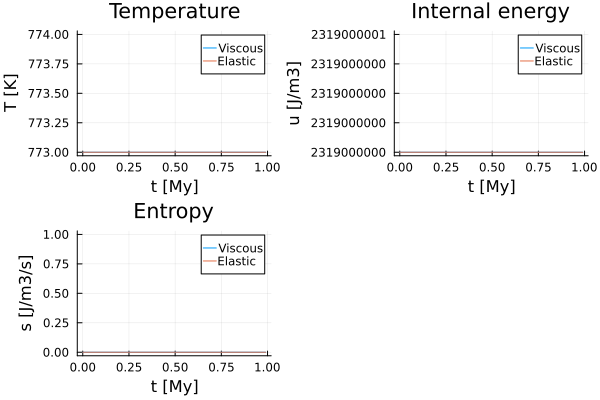

In [62]:
# Physical parameters
ε̇     = 1e-14  # strain rate      [1/s]
L     = 1e5    # length           [m]
η     = 1e15   # viscous damping  [Pa.s/m]
K     = 1e10   # spring stiffness [Pa/m]
ρ     = 3000.0 # density          [kg/m3]
c     = 1000.0 # heat capacity    [J/kg/K]
T_ini = 773.0 # initial T         [K]

# Numerical parameters
nt = 100
Δt = My/nt  # time step
t  = 0.

# Derived parameters
v     = ε̇*L
u_ini = ρ*c*T_ini

ε  = zeros(nt)
u_vec = (
    vis = u_ini*ones(nt),
    el  = u_ini*ones(nt)
    )
s_vec = (
    vis = zeros(nt),
    el  = zeros(nt)
    )
T_vec = (
    vis = T_ini*ones(nt),
    el  = T_ini*ones(nt)
    )
t_vec = t*ones(nt)

for it=2:nt

    t = t + Δt

    # Viscous case
    # ẇ_irr         = ????????
    # u_vec.vis[it] = ????????
    # T_vec.vis[it] = ????????
    # s_vec.vis[it] = ????????

    # Elastic case
    # ẇ_irr        = ????????
    # u_vec.el[it] = ????????
    # T_vec.el[it] = ????????
    # s_vec.el[it] = ????????

    t_vec[it] = t

end

p1 = plot(t_vec./My, [T_vec.vis T_vec.el], labels=["Viscous" "Elastic"], xlabel="t [My]", ylabel="T [K]", title="Temperature" )
p2 = plot(t_vec./My, [u_vec.vis u_vec.el], labels=["Viscous" "Elastic"], xlabel="t [My]", ylabel="u [J/m3]", title="Internal energy" )
p3 = plot(t_vec./My, [s_vec.vis s_vec.el], labels=["Viscous" "Elastic"], xlabel="t [My]", ylabel="s [J/m3/s]", title="Entropy" )
p4 = plot(p1, p2, p3)